**Problem Statement** :- This data science project aims to identify, understand and analyze the dynamic factors influencing the Home Price Index (HPI) in the United States over the past two decades.

Variable Information :-

1. **House_price_index** :- U.S. National Home Price Index
2. **GDP** :- Gross domestic Product
3. **Interest_rate** - An interest rate is the amount a lender charges a borrower for a debt.
4. **Construction_mat_price** :- Construction Material price rate
5. **Mortgage** :- Fixed Rate Mortgage Average in the United States
6. **Unemployment_rate** :-  Unemployment Rate in US
7. **Inflation_rate** :-  Inflation Rate in US

In [115]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import warnings

In [116]:
warnings.filterwarnings("ignore")

**Importing data**

In [117]:
Price_data = pd.read_csv("/content/House price index.csv")

In [118]:
Price_data.head()

,DATE,CSUSHPISA
0,2000-01-01,100.551
1,2000-02-01,101.339
2,2000-03-01,102.127
3,2000-04-01,102.922
4,2000-05-01,103.678


In [119]:
import datetime as dt

In [120]:
Price_data["DATE"] = pd.to_datetime(Price_data["DATE"])
Price_data["DATE"] = Price_data["DATE"].dt.strftime('%d/%m/%Y')

In [121]:
Price_data.head()

,DATE,CSUSHPISA
0,01/01/2000,100.551
1,01/02/2000,101.339
2,01/03/2000,102.127
3,01/04/2000,102.922
4,01/05/2000,103.678


In [122]:
GDP_data = pd.read_csv("/content/GDP.csv")

In [123]:
GDP_data.head()

,DATE,GDP
0,2000-01-01,10002.179
1,2000-04-01,10247.720
2,2000-07-01,10318.165
3,2000-10-01,10435.744
4,2001-01-01,10470.231


In [124]:
Interest_rate_data = pd.read_csv("/content/Interest rate.csv")

In [125]:
Interest_rate_data.head()

,DATE,INTDSRUSM193N
0,2000-01-01,5.00
1,2000-02-01,5.24
2,2000-03-01,5.34
3,2000-04-01,5.50
4,2000-05-01,5.71


In [126]:
Construction_prices = pd.read_csv("/content/construction material prices.csv")

In [127]:
Construction_prices.head()

,DATE,WPUSI012011
0,2000-01-01,144.1
1,2000-02-01,144.7
2,2000-03-01,145.4
3,2000-04-01,145.6
4,2000-05-01,144.9


In [128]:
MORTGAGE_data = pd.read_csv("/content/MORTGAGE30US.csv")

In [129]:
MORTGAGE_data.head()

,DATE,MORTGAGE30US
0,2000-01-01,8.2100000000000000
1,2000-02-01,8.3250000000000000
2,2000-03-01,8.2400000000000000
3,2000-04-01,8.1525000000000000
4,2000-05-01,8.5150000000000000


In [130]:
MORTGAGE_data.isnull().sum()

DATE            0
MORTGAGE30US    0
dtype: int64

In [131]:
Unemployment_rate_data = pd.read_csv("/content/Unemployment rate.csv")

In [132]:
Unemployment_rate_data.head()

,DATE,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0


In [133]:
Inflation_rate_data = pd.read_csv("/content/Inflation Rate.csv")

In [134]:
Inflation_rate_data.head()

,DATE,T10YIE
0,2003-01-01,1.754286
1,2003-02-01,1.912632
2,2003-03-01,1.862857
3,2003-04-01,1.774762
4,2003-05-01,1.660952


In [135]:
Inflation_rate_data.head()

,DATE,T10YIE
0,2003-01-01,1.754286
1,2003-02-01,1.912632
2,2003-03-01,1.862857
3,2003-04-01,1.774762
4,2003-05-01,1.660952


In [136]:
datasets = [GDP_data,Interest_rate_data,Construction_prices
       ,MORTGAGE_data,Unemployment_rate_data,Inflation_rate_data]

In [137]:
# Coverting datatype of DATE column from Object to Datetime and set format of Date column - DD/MM/YYYY
for i in datasets:
    i["DATE"] = pd.to_datetime(i["DATE"])
    i["DATE"] = i["DATE"].dt.strftime('%d/%m/%Y')

In [138]:
for i in datasets:
    print(i.head())

         DATE        GDP
0  01/01/2000  10002.179
1  01/04/2000  10247.720
2  01/07/2000  10318.165
3  01/10/2000  10435.744
4  01/01/2001  10470.231
         DATE  INTDSRUSM193N
0  01/01/2000           5.00
1  01/02/2000           5.24
2  01/03/2000           5.34
3  01/04/2000           5.50
4  01/05/2000           5.71
         DATE  WPUSI012011
0  01/01/2000        144.1
1  01/02/2000        144.7
2  01/03/2000        145.4
3  01/04/2000        145.6
4  01/05/2000        144.9
         DATE        MORTGAGE30US
0  01/01/2000  8.2100000000000000
1  01/02/2000  8.3250000000000000
2  01/03/2000  8.2400000000000000
3  01/04/2000  8.1525000000000000
4  01/05/2000  8.5150000000000000
         DATE  UNRATE
0  01/01/2000     4.0
1  01/02/2000     4.1
2  01/03/2000     4.0
3  01/04/2000     3.8
4  01/05/2000     4.0
         DATE    T10YIE
0  01/01/2003  1.754286
1  01/02/2003  1.912632
2  01/03/2003  1.862857
3  01/04/2003  1.774762
4  01/05/2003  1.660952


In [139]:
def merge_data(data1,data2):
    """This function Use to merge two dataframes with left join method.
    Parameters :-
    data1 = First dataframe
    data2 = Second dataframe
    """
    merge_df = data1.merge(data2, on = "DATE", how = "left")
    return merge_df

In [140]:
df = merge_data(Price_data,GDP_data)

In [141]:
df

,DATE,CSUSHPISA,GDP
0,01/01/2000,100.551,10002.179
1,01/02/2000,101.339,NaN
2,01/03/2000,102.127,NaN
3,01/04/2000,102.922,10247.720
4,01/05/2000,103.678,NaN
...,...,...,...
280,01/05/2023,302.566,NaN
281,01/06/2023,304.593,NaN
282,01/07/2023,306.767,27644.463
283,01/08/2023,309.155,NaN


In [142]:
datasets = [Interest_rate_data,Construction_prices
       ,MORTGAGE_data,Unemployment_rate_data,Inflation_rate_data]

In [143]:
# Using For loop to merge all datasets
for data in datasets:
    df = merge_data(df,data)

In [144]:
df

,DATE,CSUSHPISA,GDP,INTDSRUSM193N,WPUSI012011,MORTGAGE30US,UNRATE,T10YIE
0,01/01/2000,100.551,10002.179,5.00,144.100,8.2100000000000000,4.0,NaN
1,01/02/2000,101.339,NaN,5.24,144.700,8.3250000000000000,4.1,NaN
2,01/03/2000,102.127,NaN,5.34,145.400,8.2400000000000000,4.0,NaN
3,01/04/2000,102.922,10247.720,5.50,145.600,8.1525000000000000,3.8,NaN
4,01/05/2000,103.678,NaN,5.71,144.900,8.5150000000000000,4.0,NaN
...,...,...,...,...,...,...,...,...
280,01/05/2023,302.566,NaN,NaN,337.473,6.4250000000000000,3.7,2.213636
281,01/06/2023,304.593,NaN,NaN,337.336,6.7140000000000000,3.6,2.200476
282,01/07/2023,306.767,27644.463,NaN,334.576,6.8400000000000000,3.5,2.296500
283,01/08/2023,309.155,NaN,NaN,333.980,7.0720000000000000,3.8,2.335217


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           285 non-null    object 
 1   CSUSHPISA      285 non-null    float64
 2   GDP            95 non-null     float64
 3   INTDSRUSM193N  260 non-null    float64
 4   WPUSI012011    285 non-null    float64
 5   MORTGAGE30US   285 non-null    object 
 6   UNRATE         285 non-null    float64
 7   T10YIE         249 non-null    float64
dtypes: float64(6), object(2)
memory usage: 20.0+ KB


In [ ]:
df["MORTGAGE30US"].unique()

In [147]:
# Changing datatype of mortgage from Object to float
df["MORTGAGE30US"] = df["MORTGAGE30US"].apply(lambda x: float(x))

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           285 non-null    object 
 1   CSUSHPISA      285 non-null    float64
 2   GDP            95 non-null     float64
 3   INTDSRUSM193N  260 non-null    float64
 4   WPUSI012011    285 non-null    float64
 5   MORTGAGE30US   285 non-null    float64
 6   UNRATE         285 non-null    float64
 7   T10YIE         249 non-null    float64
dtypes: float64(7), object(1)
memory usage: 20.0+ KB


In [149]:
# Renaming all columns
df = df.rename({"INTDSRUSM193N":"Interest_rate"},axis = 1)
df = df.rename({"WPUSI012011":"Construction_mat_price"},axis = 1)
df = df.rename({"MORTGAGE30US":"Mortgage"},axis = 1)
df = df.rename({"UNRATE":"Unemployment_rate"},axis = 1)
df = df.rename({"T10YIE":"Inflation_rate"},axis = 1)
df = df.rename({"CSUSHPISA":"House_price_index"},axis = 1)

In [150]:
df.head()

,DATE,House_price_index,GDP,Interest_rate,Construction_mat_price,Mortgage,Unemployment_rate,Inflation_rate
0,01/01/2000,100.551,10002.179,5.00,144.1,8.2100,4.0,NaN
1,01/02/2000,101.339,NaN,5.24,144.7,8.3250,4.1,NaN
2,01/03/2000,102.127,NaN,5.34,145.4,8.2400,4.0,NaN
3,01/04/2000,102.922,10247.720,5.50,145.6,8.1525,3.8,NaN
4,01/05/2000,103.678,NaN,5.71,144.9,8.5150,4.0,NaN


<Axes: >

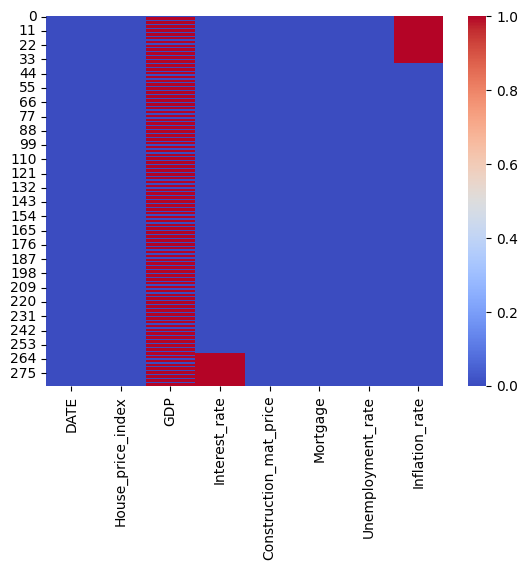

In [151]:
# Visualizing the null values in data
sn.heatmap(df.isnull(),cmap = "coolwarm", cbar = True)

In [152]:
df.head(13)

,DATE,House_price_index,GDP,Interest_rate,Construction_mat_price,Mortgage,Unemployment_rate,Inflation_rate
0,01/01/2000,100.551,10002.179,5.00,144.1,8.2100,4.0,NaN
1,01/02/2000,101.339,NaN,5.24,144.7,8.3250,4.1,NaN
2,01/03/2000,102.127,NaN,5.34,145.4,8.2400,4.0,NaN
3,01/04/2000,102.922,10247.720,5.50,145.6,8.1525,3.8,NaN
4,01/05/2000,103.678,NaN,5.71,144.9,8.5150,4.0,NaN
5,01/06/2000,104.424,NaN,6.00,145.0,8.2880,4.0,NaN
6,01/07/2000,105.054,10318.165,6.00,144.4,8.1475,4.0,NaN
7,01/08/2000,105.768,NaN,6.00,143.7,8.0275,4.1,NaN
8,01/09/2000,106.538,NaN,6.00,143.4,7.9120,3.9,NaN
9,01/10/2000,107.382,10435.744,6.00,143.3,7.7950,3.9,NaN


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    285 non-null    object 
 1   House_price_index       285 non-null    float64
 2   GDP                     95 non-null     float64
 3   Interest_rate           260 non-null    float64
 4   Construction_mat_price  285 non-null    float64
 5   Mortgage                285 non-null    float64
 6   Unemployment_rate       285 non-null    float64
 7   Inflation_rate          249 non-null    float64
dtypes: float64(7), object(1)
memory usage: 20.0+ KB


**Adding Two more columns 1.Year and 2. Month from Column DATE**

In [154]:
df["Year"] = df["DATE"].apply(lambda x : x.split("/")[2])

In [155]:
df["Month"] = df["DATE"].apply(lambda x : x.split("/")[1])

In [156]:
df["Year"].dtype

dtype('O')

## **EDA**

In [157]:
df.head()

,DATE,House_price_index,GDP,Interest_rate,Construction_mat_price,Mortgage,Unemployment_rate,Inflation_rate,Year,Month
0,01/01/2000,100.551,10002.179,5.00,144.1,8.2100,4.0,NaN,2000,01
1,01/02/2000,101.339,NaN,5.24,144.7,8.3250,4.1,NaN,2000,02
2,01/03/2000,102.127,NaN,5.34,145.4,8.2400,4.0,NaN,2000,03
3,01/04/2000,102.922,10247.720,5.50,145.6,8.1525,3.8,NaN,2000,04
4,01/05/2000,103.678,NaN,5.71,144.9,8.5150,4.0,NaN,2000,05


In [158]:
# Applying the groupby function on the year for a year-wise study.
year_group = df.groupby('Year')

In [159]:
year_group.agg({
    "House_price_index":["mean","max","min"],
    "GDP":["mean","max","min"],
    "Construction_mat_price":["mean","max","min"],
    "Interest_rate":["mean","max","min"],
    "Mortgage":["mean","max","min"],
    "Unemployment_rate":["mean","max","min"]
})

House_price_index                            GDP                        \
                  mean      max      min         mean        max        min   
Year                                                                          
2000        104.768750  109.140  100.551  10250.95200  10435.744  10002.179   
2001        113.179917  116.455  109.846  10581.92900  10660.465  10470.231   
2002        122.279250  127.624  117.144  10929.10825  11061.433  10783.500   
2003        133.731333  140.179  128.461  11456.44950  11772.234  11174.129   
2004        150.440250  159.330  141.646  12217.19575  12527.214  11923.447   
2005        171.737000  180.910  161.288  13039.19700  13324.204  12767.286   
2006        183.447500  184.364  182.321  13815.58300  14039.560  13599.160   
2007        179.918917  184.598  174.342  14474.22700  14715.058  14215.651   
2008        164.057417  173.132  153.619  14769.86175  14898.999  14608.209   
2009        148.545083  151.507  147.694  14478.06725  14651.249  14381.236   
2010        144.674500  147.396  142.060  15048.97100  15309.474  14764.610   
2011        139.259500  141.521  136.674  15599.73150  15842.259  15351.448   
2012        140.993833  145.503  136.533  16253.97000  16420.419  16068.805   
2013        154.520750  160.994  146.827  16880.68325  17192.019  16648.189   
2014        164.698167  168.050  161.927  17608.13825  17912.079  17197.738   
2015        172.181750  176.543  168.634  18295.01900  18435.137  18063.529   
2016        180.925500  185.722  177.274  18804.91325  19089.379  18525.933   
2017        191.397667  197.172  186.805  19612.10250  20037.088  19280.084   
2018        202.476417  206.156  198.315  20656.51550  20917.867  20328.553   
2019        209.463333  213.933  206.539  21521.39500  21902.390  21104.133   
2020        222.143417  236.486  214.994  21322.94950  22024.502  19913.143   
2021        260.045667  281.342  239.560  23594.03075  24654.603  22600.185   
2022        298.486750  304.724  285.924  25744.10825  26408.405  25029.116   
2023        303.074778  311.175  297.030  27173.69200  27644.463  26813.601   

     Construction_mat_price                   Interest_rate              \
                       mean      max      min          mean   max   min   
Year                                                                      
2000             144.141667  145.600  142.500      5.732500  6.00  5.00   
2001             142.800000  144.300  141.700      3.410000  5.52  1.33   
2002             144.008333  145.400  142.000      1.173333  1.25  0.75   
2003             147.108333  150.200  144.400      2.104167  2.25  2.00   
2004             161.475000  167.200  150.000      2.395833  3.25  2.00   
2005             169.558333  173.500  165.900      4.250000  5.25  3.25   
2006             180.241667  183.300  177.200      6.020833  6.25  5.50   
2007             183.175000  184.200  181.100      5.791667  6.25  4.75   
2008             196.441667  206.500  184.300      2.166667  3.50  0.50   
2009             189.175000  193.300  186.900      0.500000  0.50  0.50   
2010             194.500000  198.900  190.300      0.729167  0.75  0.50   
2011             201.125000  202.800  195.900      0.750000  0.75  0.75   
2012             205.825000  206.600  203.900      0.750000  0.75  0.75   
2013             209.275000  210.700  208.300      0.750000  0.75  0.75   
2014             214.450000  215.900  211.700      0.750000  0.75  0.75   
2015             213.541667  215.800  210.900      0.770833  1.00  0.75   
2016             213.891667  216.000  211.300      1.020833  1.25  1.00   
2017             221.641667  224.100  217.300      1.625000  2.00  1.25   
2018             235.750000  240.000  225.800      2.458333  3.00  2.00   
2019             235.725000  238.500  232.200      2.750000  3.00  2.25   
2020             239.183333  248.000  233.300      0.583333  2.25  0.25   
2021             303.412750  335.032  256.400      0.250000  0.25  0.25

In [160]:
year_wise_avg_price = year_group.agg({
    "House_price_index":["mean","max","min"],
    "GDP":["mean","max","min"],
    "Construction_mat_price":["mean","max","min"],
    "Interest_rate":["mean","max","min"],
    "Mortgage":["mean","max","min"],
    "Unemployment_rate":["mean","max","min"]
})["House_price_index"]["mean"]

In [161]:
year_wise_avg_price

Year
2000    104.768750
2001    113.179917
2002    122.279250
2003    133.731333
2004    150.440250
2005    171.737000
2006    183.447500
2007    179.918917
2008    164.057417
2009    148.545083
2010    144.674500
2011    139.259500
2012    140.993833
2013    154.520750
2014    164.698167
2015    172.181750
2016    180.925500
2017    191.397667
2018    202.476417
2019    209.463333
2020    222.143417
2021    260.045667
2022    298.486750
2023    303.074778
Name: mean, dtype: float64

In [162]:
year_wise_avg_price.drop(columns = ["index"],inplace = True)

In [163]:
year_wise_avg_price =year_wise_avg_price.reset_index()

In [164]:
year_wise_avg_price["Year"] = year_wise_avg_price["Year"].astype("int32")
year_wise_avg_price["Year"] = year_wise_avg_price["Year"].sort_values(ascending = False)

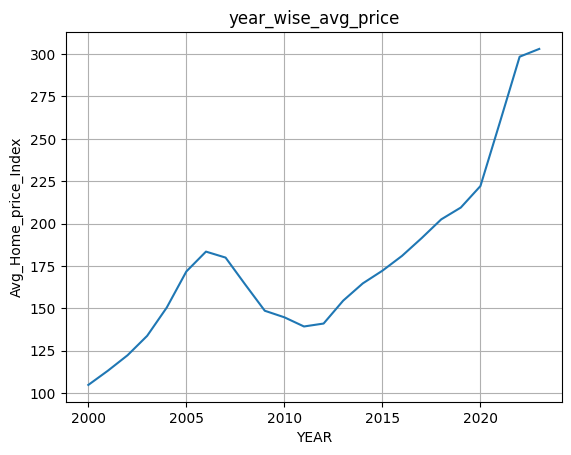

In [165]:
# Plotting Year wise Home Price Index
plt.plot(year_wise_avg_price["Year"],
         year_wise_avg_price["mean"])
plt.xlabel("YEAR")
plt.ylabel("Avg_Home_price_Index")
plt.title("year_wise_avg_price")
plt.grid()
plt.show()

In [166]:
year_wise_avg_GDP = year_group.agg({
    "House_price_index":["mean","max","min"],
    "GDP":["mean","max","min"],
    "Construction_mat_price":["mean","max","min"],
    "Interest_rate":["mean","max","min"],
    "Mortgage":["mean","max","min"],
    "Unemployment_rate":["mean","max","min"]
})["GDP"]["mean"]
year_wise_avg_GDP = year_wise_avg_GDP.reset_index()

In [167]:
year_wise_avg_GDP["Year"] = year_wise_avg_GDP["Year"].astype("int32")
year_wise_avg_GDP["Year"] = year_wise_avg_GDP["Year"].sort_values(ascending = False)

In [168]:
year_wise_avg_GDP

,Year,mean
0,2000,10250.95200
1,2001,10581.92900
2,2002,10929.10825
3,2003,11456.44950
4,2004,12217.19575
5,2005,13039.19700
6,2006,13815.58300
7,2007,14474.22700
8,2008,14769.86175
9,2009,14478.06725


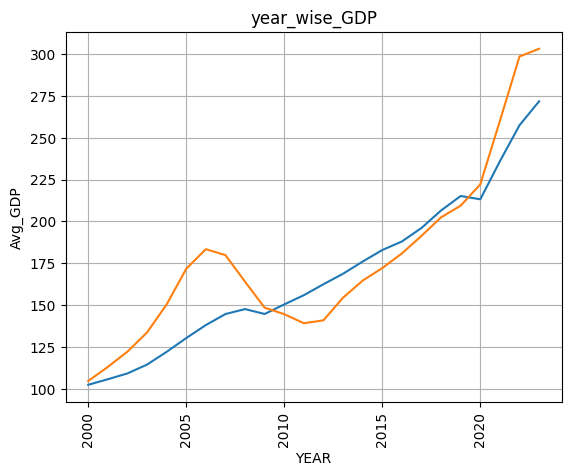

In [169]:
# Plotting Year wise GDP vs Year wise Home Price Index
plt.plot(year_wise_avg_GDP["Year"],
         year_wise_avg_GDP["mean"]/100)
plt.plot(year_wise_avg_price["Year"],
         year_wise_avg_price["mean"])
plt.xlabel("YEAR")
plt.ylabel("Avg_GDP")
plt.title("year_wise_GDP")
plt.xticks(rotation= 90)
plt.grid()
plt.show()

In [170]:
year_wise_avg_Interest_rate = year_group.agg({
    "House_price_index":["mean","max","min"],
    "GDP":["mean","max","min"],
    "Construction_mat_price":["mean","max","min"],
    "Interest_rate":["mean","max","min"],
    "Mortgage":["mean","max","min"],
    "Unemployment_rate":["mean","max","min"]
})["Interest_rate"]["mean"]
year_wise_avg_Interest_rate = year_wise_avg_Interest_rate.reset_index()

In [171]:
year_wise_avg_Interest_rate["Year"] = year_wise_avg_Interest_rate["Year"].astype("int32")
year_wise_avg_Interest_rate["Year"] = year_wise_avg_Interest_rate["Year"].sort_values(ascending = False)

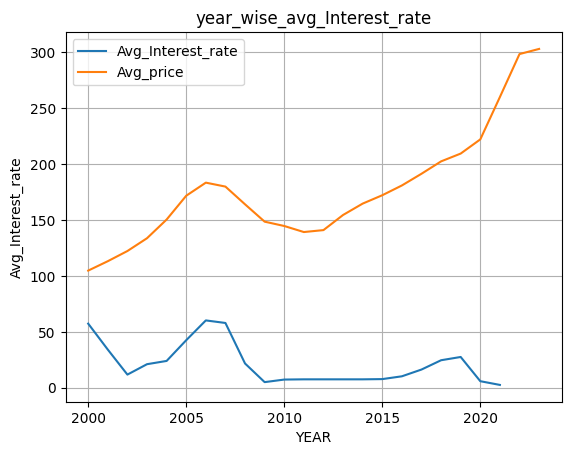

In [172]:
# Plotting Year wise Interest rate vs Year wise Home Price Index
plt.plot(year_wise_avg_Interest_rate["Year"],
         year_wise_avg_Interest_rate["mean"]*10,label = "Avg_Interest_rate")
plt.plot(year_wise_avg_price["Year"],
         year_wise_avg_price["mean"],label = "Avg_price")
plt.xlabel("YEAR")
plt.ylabel("Avg_Interest_rate")
plt.title("year_wise_avg_Interest_rate")
plt.grid()
plt.legend()
plt.show()

In [173]:
year_wise_avg_Unemployment_rate = year_group.agg({
    "House_price_index":["mean","max","min"],
    "GDP":["mean","max","min"],
    "Construction_mat_price":["mean","max","min"],
    "Interest_rate":["mean","max","min"],
    "Mortgage":["mean","max","min"],
    "Unemployment_rate":["mean","max","min"]
})["Unemployment_rate"]["mean"]
year_wise_avg_Unemployment_rate = year_wise_avg_Unemployment_rate.reset_index()

In [174]:
year_wise_avg_Unemployment_rate["Year"] = year_wise_avg_Unemployment_rate["Year"].astype("int32")
year_wise_avg_Unemployment_rate["Year"] = year_wise_avg_Unemployment_rate["Year"].sort_values(ascending = False)

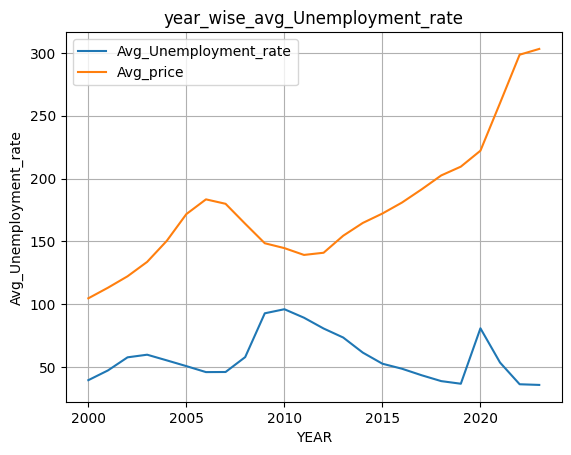

In [175]:
# Plotting Year wise unemployment Rate vs Year wise Home Price Index
plt.plot(year_wise_avg_Unemployment_rate["Year"],
         year_wise_avg_Unemployment_rate["mean"]*10,label = "Avg_Unemployment_rate")
plt.plot(year_wise_avg_price["Year"],
         year_wise_avg_price["mean"],label = "Avg_price")
plt.xlabel("YEAR")
plt.ylabel("Avg_Unemployment_rate")
plt.title("year_wise_avg_Unemployment_rate")
plt.grid()
plt.legend()
plt.show()

In [176]:
year_wise_avg_Mortgage = year_group.agg({
    "House_price_index":["mean","max","min"],
    "GDP":["mean","max","min"],
    "Construction_mat_price":["mean","max","min"],
    "Interest_rate":["mean","max","min"],
    "Mortgage":["mean","max","min"],
    "Unemployment_rate":["mean","max","min"]
})["Mortgage"]["mean"]

year_wise_avg_Mortgage = year_wise_avg_Mortgage.reset_index()

In [177]:
year_wise_avg_Mortgage["Year"] = year_wise_avg_Mortgage["Year"].astype("int32")
year_wise_avg_Mortgage["Year"] = year_wise_avg_Mortgage["Year"].sort_values(ascending = False)

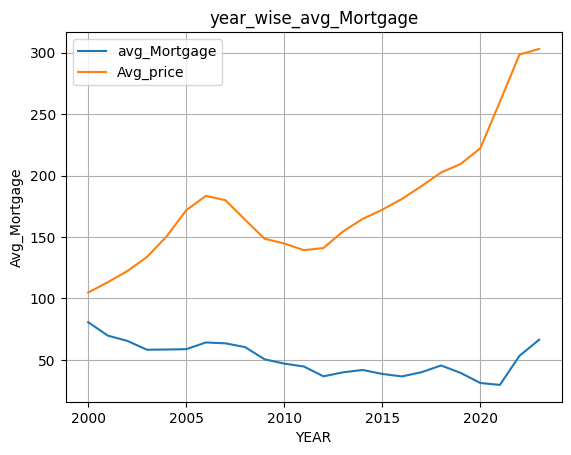

In [178]:
# Plotting Year wise Mortgage vs Year wise Home Price Index
plt.plot(year_wise_avg_Mortgage["Year"],
         year_wise_avg_Mortgage["mean"]*10,label = "avg_Mortgage")
plt.plot(year_wise_avg_price["Year"],
         year_wise_avg_price["mean"],label = "Avg_price")
plt.xlabel("YEAR")
plt.ylabel("Avg_Mortgage")
plt.title("year_wise_avg_Mortgage")
plt.grid()
plt.legend()
plt.show()

In [179]:
year_wise_avg_Const_mat_price = year_group.agg({
    "House_price_index":["mean","max","min"],
    "GDP":["mean","max","min"],
    "Construction_mat_price":["mean","max","min"],
    "Interest_rate":["mean","max","min"],
    "Mortgage":["mean","max","min"],
    "Unemployment_rate":["mean","max","min"]
})["Construction_mat_price"]["mean"]

year_wise_avg_Const_mat_price = year_wise_avg_Const_mat_price.reset_index()

In [180]:
year_wise_avg_Const_mat_price["Year"] = year_wise_avg_Const_mat_price["Year"].astype("int32")
year_wise_avg_Const_mat_price["Year"] = year_wise_avg_Const_mat_price["Year"].sort_values(ascending = False)

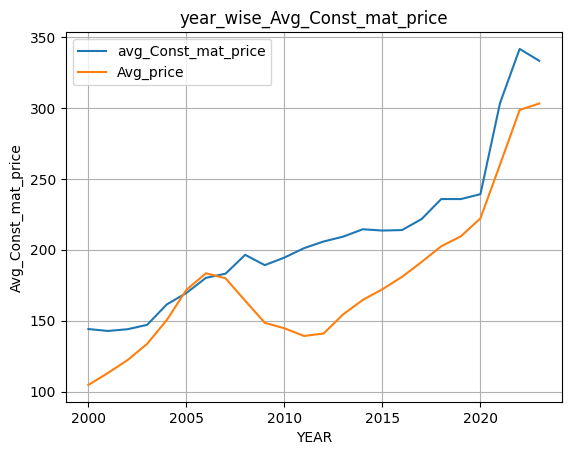

In [181]:
# Plotting Year wise Construction Material cost rate vs Year wise Home Price Index
plt.plot(year_wise_avg_Const_mat_price["Year"],
         year_wise_avg_Const_mat_price["mean"],label = "avg_Const_mat_price")
plt.plot(year_wise_avg_price["Year"],
         year_wise_avg_price["mean"],label = "Avg_price")
plt.xlabel("YEAR")
plt.ylabel("Avg_Const_mat_price")
plt.title("year_wise_Avg_Const_mat_price")
plt.grid()
plt.legend()
plt.show()

In [182]:
def Num_var(data):
  var = [i for i in data.columns if data[i].dtype != "O"]
  return var

In [183]:
cols = Num_var(df)

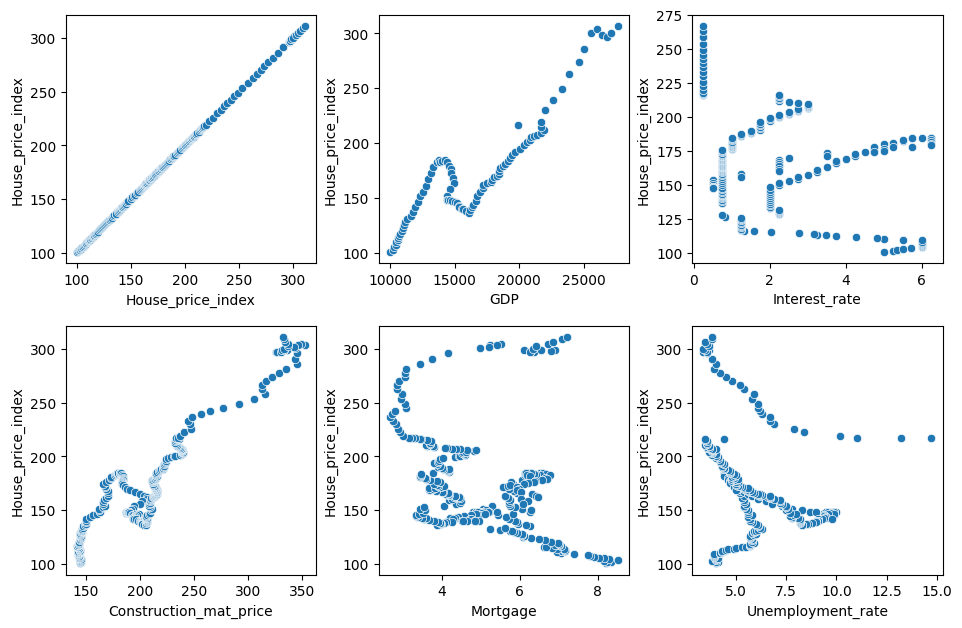

In [184]:
# Plotting scatterplot for  Home Price Index W.R.T all other columns

fig = plt.figure(figsize = (80,80))

gs = fig.add_gridspec(20,20)

gs.update(wspace = 0.25,hspace = 0.25)

ax0 = fig.add_subplot(gs[0,0],)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


Axis = [ax0,ax1,ax2,ax3,ax4,ax5]

for ax,col in zip(Axis,cols):
    sn.scatterplot(data = df, x=col, y=df["House_price_index"],ax = ax)
plt.show()

In [185]:
df

,DATE,House_price_index,GDP,Interest_rate,Construction_mat_price,Mortgage,Unemployment_rate,Inflation_rate,Year,Month
0,01/01/2000,100.551,10002.179,5.00,144.100,8.2100,4.0,NaN,2000,01
1,01/02/2000,101.339,NaN,5.24,144.700,8.3250,4.1,NaN,2000,02
2,01/03/2000,102.127,NaN,5.34,145.400,8.2400,4.0,NaN,2000,03
3,01/04/2000,102.922,10247.720,5.50,145.600,8.1525,3.8,NaN,2000,04
4,01/05/2000,103.678,NaN,5.71,144.900,8.5150,4.0,NaN,2000,05
...,...,...,...,...,...,...,...,...,...,...
280,01/05/2023,302.566,NaN,NaN,337.473,6.4250,3.7,2.213636,2023,05
281,01/06/2023,304.593,NaN,NaN,337.336,6.7140,3.6,2.200476,2023,06
282,01/07/2023,306.767,27644.463,NaN,334.576,6.8400,3.5,2.296500,2023,07
283,01/08/2023,309.155,NaN,NaN,333.980,7.0720,3.8,2.335217,2023,08


<Axes: >

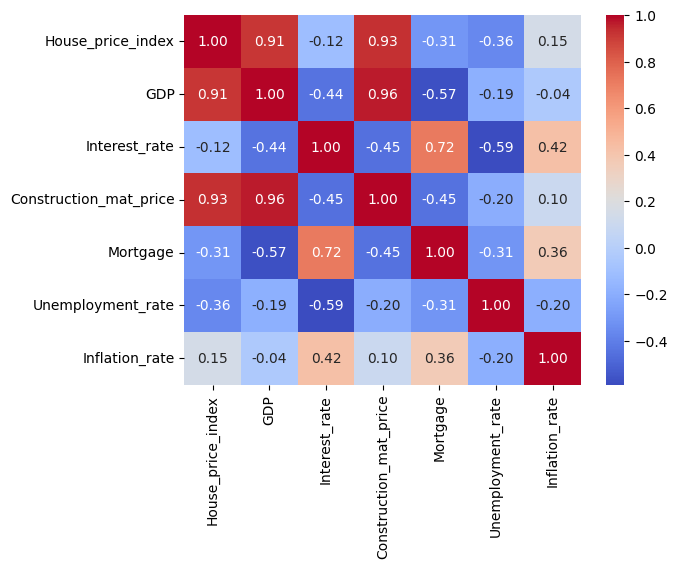

In [186]:
# finding correlation for all attributes
sn.heatmap(df.corr(),annot = True, cmap = "coolwarm",cbar = True,fmt = ".2f")

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    285 non-null    object 
 1   House_price_index       285 non-null    float64
 2   GDP                     95 non-null     float64
 3   Interest_rate           260 non-null    float64
 4   Construction_mat_price  285 non-null    float64
 5   Mortgage                285 non-null    float64
 6   Unemployment_rate       285 non-null    float64
 7   Inflation_rate          249 non-null    float64
 8   Year                    285 non-null    object 
 9   Month                   285 non-null    object 
dtypes: float64(7), object(3)
memory usage: 24.5+ KB


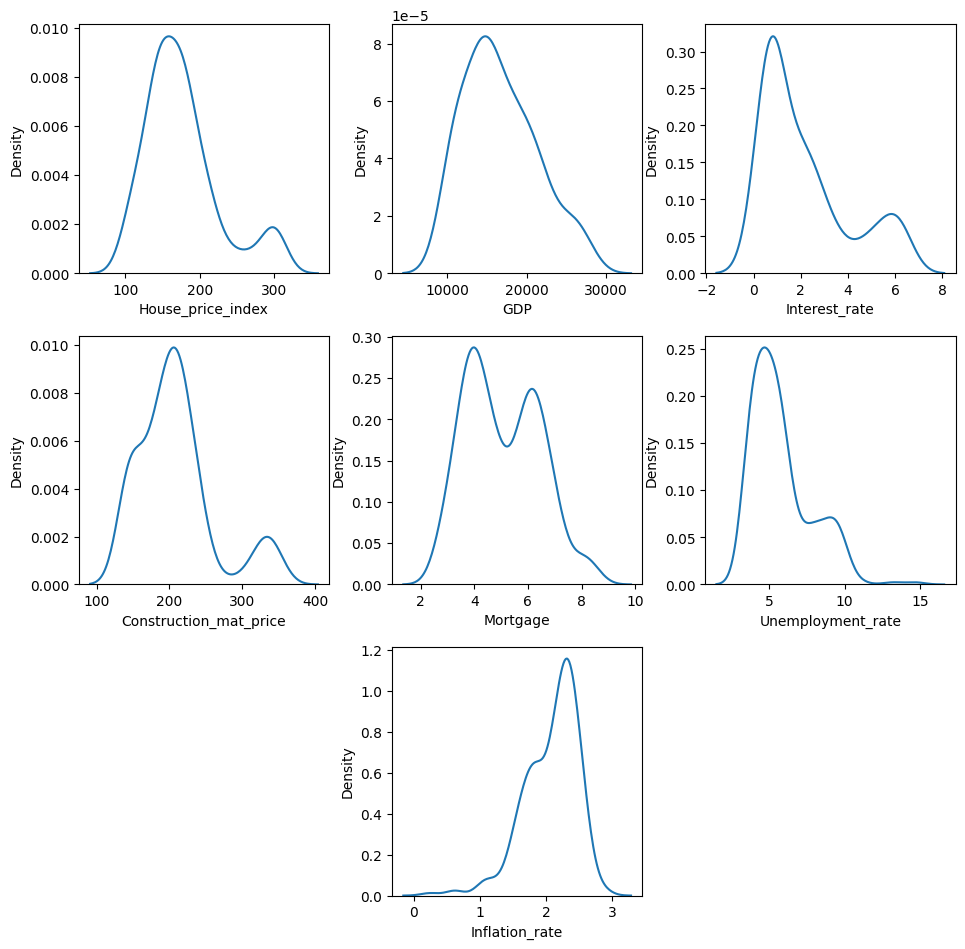

In [188]:
# Plotting distributions for all attributes

fig = plt.figure(figsize = (80,80))

gs = fig.add_gridspec(20,20)

gs.update(wspace = 0.25,hspace = 0.25)

ax0 = fig.add_subplot(gs[0,0],)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,1])


Axis = [ax0,ax1,ax2,ax3,ax4,ax5,ax6]

for ax,col in zip(Axis,cols):
  sn.kdeplot(data = df, x=col,ax = ax)
plt.show()

In [189]:
df["GDP"] = df["GDP"].fillna(method = "ffill")

In [190]:
df["Interest_rate"] = df["Interest_rate"].fillna(method = "ffill")

In [191]:
df.head()

,DATE,House_price_index,GDP,Interest_rate,Construction_mat_price,Mortgage,Unemployment_rate,Inflation_rate,Year,Month
0,01/01/2000,100.551,10002.179,5.00,144.1,8.2100,4.0,NaN,2000,01
1,01/02/2000,101.339,10002.179,5.24,144.7,8.3250,4.1,NaN,2000,02
2,01/03/2000,102.127,10002.179,5.34,145.4,8.2400,4.0,NaN,2000,03
3,01/04/2000,102.922,10247.720,5.50,145.6,8.1525,3.8,NaN,2000,04
4,01/05/2000,103.678,10247.720,5.71,144.9,8.5150,4.0,NaN,2000,05


## **Feature Engineering**

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X = df.drop(["DATE","House_price_index","Year","Month"],axis = 1)
y = df["House_price_index"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199, 6)
(86, 6)
(199,)
(86,)


In [194]:
df.head()

,DATE,House_price_index,GDP,Interest_rate,Construction_mat_price,Mortgage,Unemployment_rate,Inflation_rate,Year,Month
0,01/01/2000,100.551,10002.179,5.00,144.1,8.2100,4.0,NaN,2000,01
1,01/02/2000,101.339,10002.179,5.24,144.7,8.3250,4.1,NaN,2000,02
2,01/03/2000,102.127,10002.179,5.34,145.4,8.2400,4.0,NaN,2000,03
3,01/04/2000,102.922,10247.720,5.50,145.6,8.1525,3.8,NaN,2000,04
4,01/05/2000,103.678,10247.720,5.71,144.9,8.5150,4.0,NaN,2000,05


In [195]:
X_train.head()

,GDP,Interest_rate,Construction_mat_price,Mortgage,Unemployment_rate,Inflation_rate
182,18063.529,0.75,215.0,3.7700,5.4,1.761818
55,12305.307,2.50,165.9,5.8675,5.4,2.421818
112,14381.236,0.50,186.9,4.8575,9.4,1.576000
221,20580.912,2.50,239.2,4.5700,4.0,2.117619
38,11174.129,2.25,145.2,5.7450,5.9,1.862857


In [196]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [197]:
tfm1 = ColumnTransformer(transformers = [
    ("Inflation_rate",SimpleImputer(strategy="constant",fill_value=0),[5])
],remainder = "passthrough")

In [198]:
X_train.isna().sum()

GDP                        0
Interest_rate              0
Construction_mat_price     0
Mortgage                   0
Unemployment_rate          0
Inflation_rate            23
dtype: int64

In [199]:
tfm2 = ColumnTransformer(transformers = [
    ("Inflation_rate",StandardScaler(),[0]),
    ("GDP",StandardScaler(),[1]),
    ("Interest_rate",StandardScaler(),[2]),
    ("Construction_mat_price",StandardScaler(),[3]),
    ("Mortgage",StandardScaler(),[4]),
    ("Unemployment_rate",StandardScaler(),[5]),
],remainder="passthrough")

In [200]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

In [201]:
from sklearn.pipeline import Pipeline

## **Linear Regression**

In [202]:
lr_pipe = Pipeline([
    ("tfm1",tfm1),
    ("tfm2",tfm2),
    ("sgd",sgd)
])

In [203]:
lr = lr_pipe.fit(X_train,y_train)

In [204]:
lr_y_pred = lr.predict(X_test)

In [205]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [206]:
print(f"r2 score is :- {r2_score(y_test,lr_y_pred)*100} %")
print(f"Root mean square error is :- {np.sqrt(mean_squared_error(y_test,lr_y_pred))}")
print(f"Mean absolute error is :- {mean_absolute_error(y_test,lr_y_pred)}")

r2 score is :- 94.23290222585203 %
Root mean square error is :- 12.649768052028897
Mean absolute error is :- 10.626495347739132


In [207]:
def adj_r2_score(R2_score,n = X_test.shape[0],k = X_test.shape[1]):
  res = (1-R2_score)*(n-1)/(n-1-k)
  result = 1 - res
  return result

In [208]:
adj_r2_score(r2_score(y_test,lr_y_pred))

0.9379489479996738

In [209]:
metric_grid = pd.DataFrame()
lr_metrics = {
    "Algorithm":"Linear Regression",
    "r2 score":r2_score(y_test,lr_y_pred)*100,
    "Adjusted r2 score":adj_r2_score(r2_score(y_test,lr_y_pred)),
    "RMSE":np.sqrt(mean_squared_error(y_test,lr_y_pred)),
    "MAE":mean_absolute_error(y_test,lr_y_pred)
}

In [210]:
metric_grid = metric_grid.append(lr_metrics,ignore_index=True)

## **Gradient Boost**

In [211]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.3,n_estimators=200,max_depth =5)

In [212]:
gb_pipe = Pipeline([
    ("tfm1",tfm1),
    ("tfm2",tfm2),
    ("gb",gb)
])

gbr = gb_pipe.fit(X_train,y_train)

gb_y_pred = gbr.predict(X_test)

print(f"r2 score is :- {r2_score(y_test,gb_y_pred)*100} %")
print(f"Root mean square error is :- {np.sqrt(mean_squared_error(y_test,gb_y_pred))}")
print(f"Mean absolute error is :- {mean_absolute_error(y_test,gb_y_pred)}")

r2 score is :- 99.71428098695988 %
Root mean square error is :- 2.815616332407131
Mean absolute error is :- 1.7303003429282835


In [213]:
gb_metrics = {
    "Algorithm":"Gradient Boost",
    "r2 score":r2_score(y_test,gb_y_pred)*100,
    "Adjusted r2 score":adj_r2_score(r2_score(y_test,gb_y_pred)),
    "RMSE":np.sqrt(mean_squared_error(y_test,gb_y_pred)),
    "MAE":mean_absolute_error(y_test,gb_y_pred)
}
metric_grid = metric_grid.append(gb_metrics,ignore_index=True)
metric_grid

,Algorithm,r2 score,Adjusted r2 score,RMSE,MAE
0,Linear Regression,94.232902,0.937949,12.649768,10.626495
1,Gradient Boost,99.714281,0.996926,2.815616,1.730300


## **XG Boost**

In [214]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [215]:
xgb_pipe = Pipeline([
    ("tfm1",tfm1),
    ("tfm2",tfm2),
    ("xgb",xgb)
])

xgbr = xgb_pipe.fit(X_train,y_train)

xgb_y_pred = xgbr.predict(X_test)

print(f"r2 score is :- {r2_score(y_test,xgb_y_pred)*100} %")
print(f"Root mean square error is :- {np.sqrt(mean_squared_error(y_test,xgb_y_pred))}")
print(f"Mean absolute error is :- {mean_absolute_error(y_test,xgb_y_pred)}")

r2 score is :- 99.75230559694616 %
Root mean square error is :- 2.6215732789787385
Mean absolute error is :- 1.7917490425997011


In [216]:
xgb_metrics = {
    "Algorithm":"XB Boost",
    "r2 score":r2_score(y_test,xgb_y_pred)*100,
    "Adjusted r2 score":adj_r2_score(r2_score(y_test,xgb_y_pred)),
    "RMSE":np.sqrt(mean_squared_error(y_test,xgb_y_pred)),
    "MAE":mean_absolute_error(y_test,xgb_y_pred)
}
metric_grid = metric_grid.append(xgb_metrics,ignore_index=True)
metric_grid

,Algorithm,r2 score,Adjusted r2 score,RMSE,MAE
0,Linear Regression,94.232902,0.937949,12.649768,10.626495
1,Gradient Boost,99.714281,0.996926,2.815616,1.730300
2,XB Boost,99.752306,0.997335,2.621573,1.791749


 **Conclusions** :-
1. From the above analysis, we can conclude that the variables that are most affecting the US Home Price Index for the last 20 years are GDP and Construction Material Cost Rate. These variables positively impact the HPI with correlations of 0.91 and 0.93, respectively.

2. In predictive analysis, the XGBoost algorithm performs well on the data, achieving the highest accuracy of 99.73%.

**reference** = https://fastercapital.com/content/Unveiling-the-factors-influencing-the-House-Price-Index--HPI.html#Introduction-to-House-Price-Index-HPI